<a href="https://colab.research.google.com/github/davidofitaly/03_linear_regression_projects/blob/main/02_california_housing.project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data loading](#1)
3. [Create a copy data](#2)
4. [Data mining and preprocessing](#3)
5. [Correlation](#4)
6. [Division of data into training data and test collection](#5)
7. [Linear regression](#6)
8. [Model-based prediction](#7)
9. [Linear regression metrics](#8)


### <a name='0'></a> Import of libraries

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


### <a name='1'></a> Data loading

In [ ]:
# Import fetch_california_housing datasets
from sklearn.datasets import fetch_california_housing

# Load California housing data and create DataFrame and add target(price)
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['Price'] = california.target

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### <a name='2'></a> Create a copy data

In [ ]:
# Create a copy of the DataFrame
df = california_df.copy()

# Display DataFrame information (columns, data types, non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### <a name='3'></a> Data mining and preprocessing

- Duplicates

In [ ]:
# Show rows that are duplicates
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price


- Missing values

In [ ]:
# Count the number of missing (null) values in each column
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


- Describe data

In [ ]:
# Showu summary statistics, transposed for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


- Data distribution

<Axes: ylabel='Frequency'>

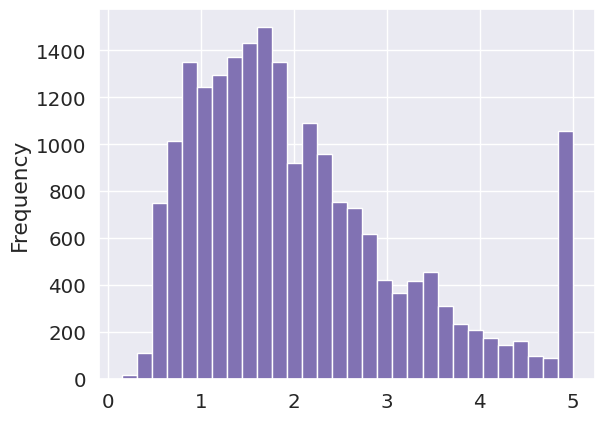

In [ ]:
# Plot a histogram of the 'Price' column with 30 bins and magenta color
df.Price.plot(kind='hist', bins=30, color='m')

<Axes: ylabel='Frequency'>

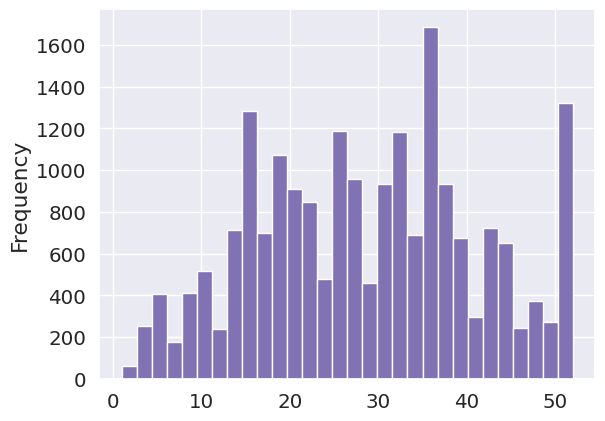

In [ ]:
# Plot a histogram of the 'HouseAge' column with 30 bins and magenta color
df.HouseAge.plot(kind='hist', bins=30, color='m')

<Axes: ylabel='Frequency'>

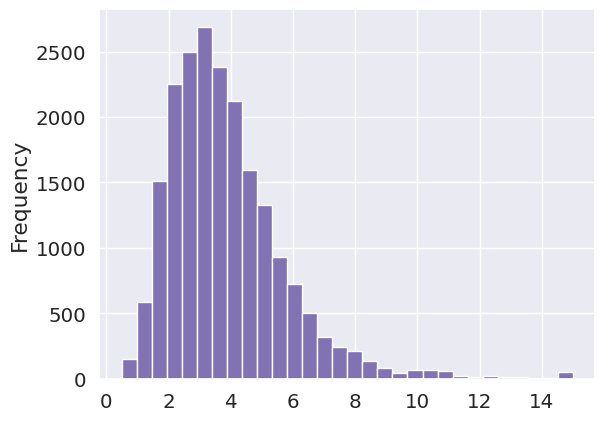

In [ ]:
# Plot a histogram of the 'MedInc' column with 30 bins and magenta color
df.MedInc.plot(kind='hist', bins=30, color='m')

### <a name='4'></a> Correlation

In [ ]:
# Calculate the correlation matrix for the DataFrame
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

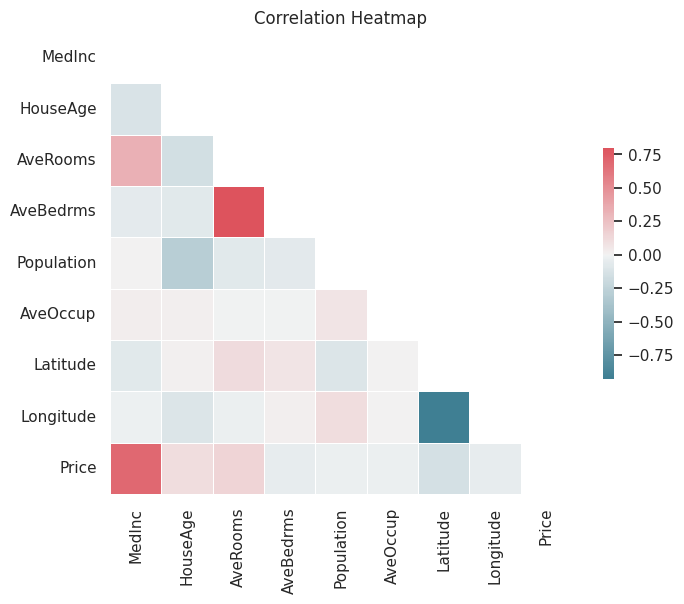

In [ ]:
sns.set(style="white")  # Set the style for seaborn plots to 'white'
mask = np.zeros_like(corr, dtype=bool)  # Create a mask for the upper triangle of the correlation matrix
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6)) # Create fiure and axis with specified size
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Create a diverging color palette
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw a heatmap with the correlation matrix
plt.title('Correlation Heatmap') # Set the title of the heatmap



In [ ]:
# Calculate and sort the corelattion of all features with 'Price' in descending order
df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


<Axes: >

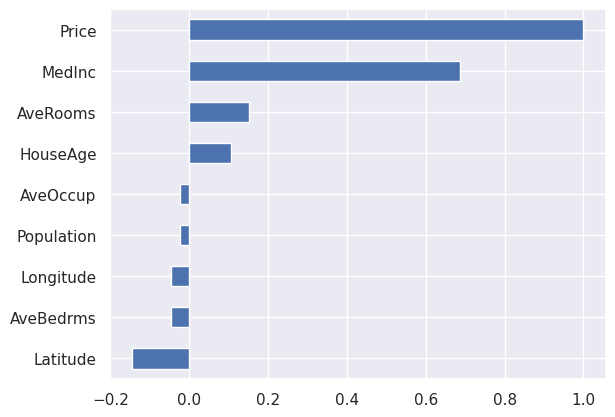

In [ ]:
sns.set()
# Calculate the correlation of all features with 'Price', sort them, and plot as a horizontal bar chart
df.corr()['Price'].sort_values().plot(kind='barh')

In [ ]:
# Create a copy of the DataFrame
data = df.copy()

# Remove the 'Price' column from data and store it as the target variable
target = data.pop('Price')

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# Display the first 5 rows of the target variable (Price)
target.head()

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### <a name='5'></a> Division of data into training data and test collection

In [ ]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Print the shape of each set to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


### <a name='6'></a> Linear regression

In [ ]:
# Import LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Get the intercept of the trained linear regression model
intercept = regressor.intercept_
intercept

-37.24520696029003

In [ ]:
# Get the coef of the trained linear regeession model
coef = regressor.coef_
coef

array([ 0.4296,  0.0096, -0.0979,  0.5902, -0.    , -0.0034, -0.425 ,
       -0.4384])

In [ ]:
# Create a DataFrame to store features and the corresponding coefficients
coef_df = pd. DataFrame({
    'Feature': X_train.columns,
    'Coefficient': regressor.coef_
})

coef_df.round(5)

,Feature,Coefficient
0,MedInc,0.42956
1,HouseAge,0.00960
2,AveRooms,-0.09788
3,AveBedrms,0.59016
4,Population,-0.00000
5,AveOccup,-0.00342
6,Latitude,-0.42497
7,Longitude,-0.43836


### <a name='7'></a> Model-based prediction

In [ ]:
y_true = y_test.copy()
y_pred = regressor.predict(X_test)

# Create a DataFrame with true and predicted values, and colculate error and squared error
predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred':y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions['error_squared'] = predictions['error'] **2
predictions.head()

,y_true,y_pred,error,error_squared
17424,1.115,2.283115,-1.168115,1.364492
7707,3.266,2.219832,1.046168,1.094468
736,1.962,2.377413,-0.415413,0.172568
15408,1.488,1.232054,0.255946,0.065509
18575,1.620,1.975721,-0.355721,0.126537


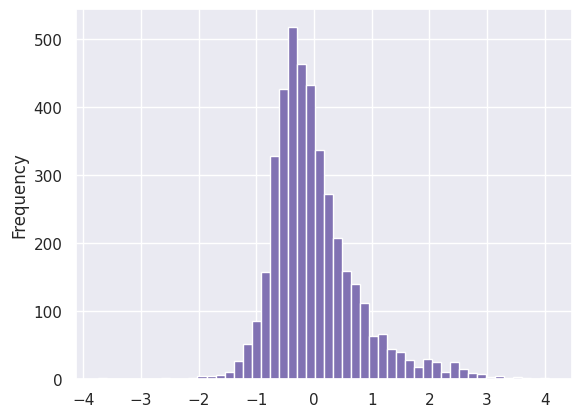

In [ ]:
# Plot a histogram of the errors predictions to analyze their distribution
_ = predictions['error'].plot(kind='hist', bins=50, color='m')

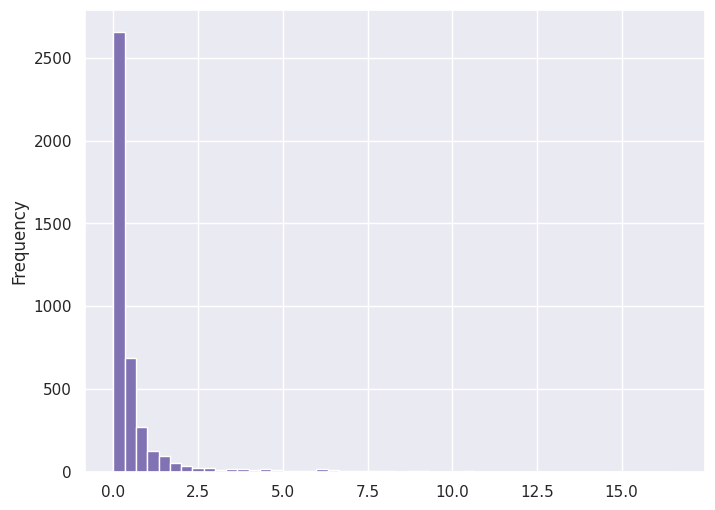

In [ ]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

### <a name='8'></a> Linear regression metrics

- Mean Absolute Error

In [ ]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred):.3f}")


The model makes an average error of 0.545


- Mean Squared Error

In [ ]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred):.3f}')

The mean squared error of the model is: 0.550


- Root Mean Squared Error - RMSE

In [ ]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 0.742


- Max Error

In [ ]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 4.079


- R2 score - coefficient of determination

In [ ]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.596
